## **Install EasyOCR**

In [ ]:
!pip install easyocr

In [ ]:
from easyocr import Reader      # Using EasyOCR for extracting text

# Load model for the English language
language_reader = Reader(["en"])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

## **Install Pypdfium**

In [2]:
!pip install -U pypdfium2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 25.2 MB/s eta 0:00:00


In [3]:
!pip install PyPDF2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 4.4 MB/s eta 0:00:00


## **Import required packages**

In [4]:
import pypdfium2 as pdfium
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
from io import BytesIO
import glob
import os

In [ ]:
df = pd.DataFrame(columns = ('filename', 'formtype', 'text_content', 'label'))
df

,filename,formtype,text_content,label


## **Function to fetch the first page of all the pdf files**

In [ ]:
def get_first_page_only(pdf_path):
    pages_to_keep = [0] # page numbering starts from 0
    infile = PdfReader(pdf_path, 'rb')
    output = PdfWriter()

    for i in pages_to_keep:
        p = infile.pages[i]
        output.add_page(p)

    with open('/content/drive/MyDrive/modified_sec_edgar/' + os.path.split(pdf_path)[-1], 'wb') as f:
        output.write(f)

## **Function to extract Text from Images**

In [ ]:
def extract_text_with_easyocr(list_dict_final_images):

    image_list = [list(data.values())[0] for data in list_dict_final_images]
    image_content = []

    for index, image_bytes in enumerate(image_list):

        image = Image.open(BytesIO(image_bytes))
        raw_text = language_reader.readtext(image)
        raw_text = "\n".join([res[1] for res in raw_text])

        image_content.append(raw_text)

    return "\n".join(image_content)

## **Function to convert PDF to Images**

In [ ]:
def convert_pdf_to_images(file_path, scale=300/72):

    pdf_file = pdfium.PdfDocument(file_path)
    page_indices = [i for i in range(len(pdf_file))]

    renderer = pdf_file.render(
        pdfium.PdfBitmap.to_pil,
        page_indices = page_indices,
        scale = scale,
    )

    list_final_images = []

    for i, image in zip(page_indices, renderer):

        image_byte_array = BytesIO()
        image.save(image_byte_array, format='jpeg', optimize=True)
        image_byte_array = image_byte_array.getvalue()
        list_final_images.append(dict({i:image_byte_array}))

    # text_with_easy_ocr = extract_text_with_easyocr(list_final_images)

    return list_final_images

## **Function to display the converted Images**

In [ ]:
# def display_images(list_dict_final_images):

#     all_images = [list(data.values())[0] for data in list_dict_final_images]

#     for index, image_bytes in enumerate(all_images):

#         image = Image.open(BytesIO(image_bytes))
#         figure = plt.figure(figsize = (image.width / 100, image.height / 100))

#         plt.title(f"----- Page Number {index+1} -----")
#         plt.imshow(image)
#         plt.axis("off")
#         plt.show()

In [ ]:
# Passing all the complete pdf files to fetch the first page and store in a seperate directory

pdfs = glob.glob('/content/drive/MyDrive/sec_edgar/*.pdf')
for i in pdfs:
    get_first_page_only(i)

In [ ]:
# Populating the 'filename' column with the pdf names

pdfs = glob.glob('/content/drive/MyDrive/sec_edgar/*.pdf')
for n, file in zip(range(len(pdfs)), pdfs):
    df.at[n, 'filename'] = os.path.split(file)[-1]

In [ ]:
# df.to_excel("SEC NLP Assignment.xlsx")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/SEC NLP Assignment.csv')
df

,Unnamed: 0,filename,formtype,text_content,label
0,0,00049397.pdf,Form D,NaN,NaN
1,1,00068790.pdf,Form D,NaN,NaN
2,2,00092635.pdf,Form D,NaN,NaN
3,3,00092782.pdf,Form 13F,NaN,NaN
4,4,00092785.pdf,Form D,NaN,NaN
...,...,...,...,...,...
299,299,01082108.pdf,Form 19B-4,NaN,NaN
300,300,01082109.pdf,Form 13F,NaN,NaN
301,301,01082110.pdf,Form 13F,NaN,NaN
302,302,01082111.pdf,Form 13F,NaN,NaN


In [ ]:
# Labelling the different Form types with distinct labels

for i in range(0, 304):
    if df.at[i, 'formtype']=='Form D':
      df.at[i, 'label'] = 0
    elif df.at[i, 'formtype']=='Form 13F':
      df.at[i, 'label'] = 1
    elif df.at[i, 'formtype']=='Form X-17A-5':
      df.at[i, 'label'] = 2
    elif df.at[i, 'formtype']=='Form TA-2':
      df.at[i, 'label'] = 3
    elif df.at[i, 'formtype']=='Form 6-K':
      df.at[i, 'label'] = 4
    elif df.at[i, 'formtype']=='Form 11-K':
      df.at[i, 'label'] = 5
    elif df.at[i, 'formtype']=='Form 19B-4':
      df.at[i, 'label'] = 6
    elif df.at[i, 'formtype']=='Other':
      df.at[i, 'label'] = 7

In [ ]:
df

,Unnamed: 0,filename,formtype,text_content,label
0,0,00049397.pdf,Form D,NaN,0.0
1,1,00068790.pdf,Form D,NaN,0.0
2,2,00092635.pdf,Form D,NaN,0.0
3,3,00092782.pdf,Form 13F,NaN,1.0
4,4,00092785.pdf,Form D,NaN,0.0
...,...,...,...,...,...
299,299,01082108.pdf,Form 19B-4,NaN,6.0
300,300,01082109.pdf,Form 13F,NaN,1.0
301,301,01082110.pdf,Form 13F,NaN,1.0
302,302,01082111.pdf,Form 13F,NaN,1.0


## **Function call to extract text from all the pdf files**

In [ ]:
mod_pdfs = glob.glob('/content/drive/MyDrive/modified_sec_edgar/*.pdf')
all_pdf_content = []      # list to get the pdf text content
for i in mod_pdfs:
  print(i)
  converted_image = convert_pdf_to_images(i)
  text_with_easy_ocr = extract_text_with_easyocr(converted_image)
  all_pdf_content.append(text_with_easy_ocr)

/content/drive/MyDrive/modified_sec_edgar/00049397.pdf
/content/drive/MyDrive/modified_sec_edgar/00068790.pdf
/content/drive/MyDrive/modified_sec_edgar/00092635.pdf
/content/drive/MyDrive/modified_sec_edgar/00092782.pdf
/content/drive/MyDrive/modified_sec_edgar/00092785.pdf
/content/drive/MyDrive/modified_sec_edgar/00092786.pdf
/content/drive/MyDrive/modified_sec_edgar/00092787.pdf
/content/drive/MyDrive/modified_sec_edgar/00092788.pdf
/content/drive/MyDrive/modified_sec_edgar/00092789.pdf
/content/drive/MyDrive/modified_sec_edgar/00092791.pdf
/content/drive/MyDrive/modified_sec_edgar/00092793.pdf
/content/drive/MyDrive/modified_sec_edgar/00092794.pdf
/content/drive/MyDrive/modified_sec_edgar/00092795.pdf
/content/drive/MyDrive/modified_sec_edgar/00092796.pdf
/content/drive/MyDrive/modified_sec_edgar/00092797.pdf
/content/drive/MyDrive/modified_sec_edgar/00092798.pdf
/content/drive/MyDrive/modified_sec_edgar/00092799.pdf
/content/drive/MyDrive/modified_sec_edgar/00092800.pdf
/content/d

In [ ]:
df['text_content'] = all_pdf_content       # Dataframe with all the values populated
df

,Unnamed: 0,filename,formtype,text_content,label
0,0,00049397.pdf,Form D,R1F-[0925-70\nFORM D\nUNITED STATES\nOMB Appro...,0.0
1,1,00068790.pdf,Form D,FORM D\nOMB APPROVAL\nUNITED STATES\nOMB Numbe...,0.0
2,2,00092635.pdf,Form D,FORM D\nUNITED STATES\nOMB APPROVAL\nSECURITIE...,0.0
3,3,00092782.pdf,Form 13F,Rer\nJ4C\nUNITED STATES\n00 09 2782\nSECURITI...,1.0
4,4,00092785.pdf,Form D,3\nTC71278 3\nFORM D\nOMB APPROVAL\nOMB Numbar...,0.0
...,...,...,...,...,...
299,299,01082108.pdf,Form 19B-4,7(-uo\n[oc Fis383g1z8.\nSubioit [\nPniginal\nO...,6.0
300,300,01082109.pdf,Form 13F,b0MH\n23;\np\nbMENovE-APPROVAIS\n30\n5\n4\nExp...,1.0
301,301,01082110.pdf,Form 13F,44 6oX\n117\n1vi LUUI\n1V;uJ\nrAA\nP4\nAltn Gu...,1.0
302,302,01082111.pdf,Form 13F,Tts doament % submitted 48 CONHDENTLAL Excmpti...,1.0


In [ ]:
df.to_csv('Final NLP dataset.csv')

In [5]:
df = pd.read_csv('/content/drive/MyDrive/SEC NLP Assignment.csv')

## **Exploratory Data Analysis (EDA)**

In [6]:
df['formtype'].value_counts()

Form 13F        197
Form D           41
Other            40
Form X-17A-5     11
Form TA-2         6
Form 19B-4        6
Form 6-K          2
Form 11-K         1
Name: formtype, dtype: int64

In [7]:
df.shape

(304, 5)

Text(0, 0.5, 'Formtype')

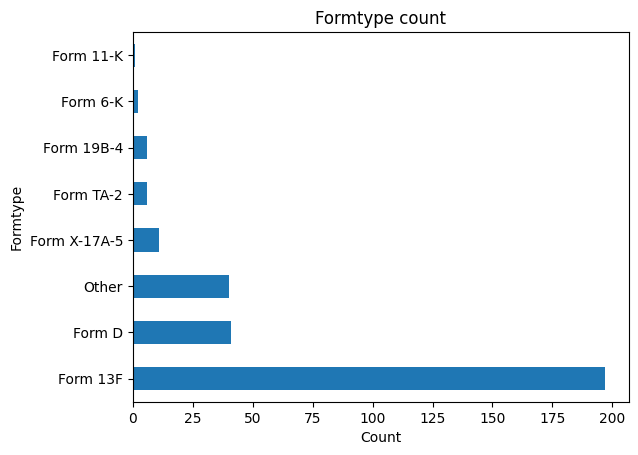

In [8]:
ax = df['formtype'].value_counts().plot(kind = 'barh', title = 'Formtype count')
ax.set_xlabel('Count')
ax.set_ylabel('Formtype')

In [9]:
df.groupby('formtype').describe()

Unnamed: 0                                                       \
                  count        mean        std    min     25%    50%     75%   
formtype                                                                       
Form 11-K           1.0  183.000000        NaN  183.0  183.00  183.0  183.00   
Form 13F          197.0  146.984772  93.381076    3.0   64.00  139.0  241.00   
Form 19B-4          6.0  296.500000   1.870829  294.0  295.25  296.5  297.75   
Form 6-K            2.0  115.500000   0.707107  115.0  115.25  115.5  115.75   
Form D             41.0  139.390244  99.240586    0.0   52.00  176.0  202.00   
Form TA-2           6.0  120.500000   3.391165  117.0  118.25  119.5  122.25   
Form X-17A-5       11.0  122.272727   6.574054  112.0  117.50  124.0  127.50   
Other              40.0  178.100000  37.338232   20.0  162.75  172.5  187.75   

                     label                                     
                max  count mean  std  min  25%  50%  75%  max  
formtype                                                       
Form 11-K     183.0    1.0  5.0  NaN  5.0  5.0  5.0  5.0  5.0  
Form 13F      303.0  197.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
Form 19B-4    299.0    6.0  6.0  0.0  6.0  6.0  6.0  6.0  6.0  
Form 6-K      116.0    2.0  4.0  0.0  4.0  4.0  4.0  4.0  4.0  
Form D        293.0   41.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
Form TA-2     126.0    6.0  3.0  0.0  3.0  3.0  3.0  3.0  3.0  
Form X-17A-5  130.0   11.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0  
Other         232.0   40.0  7.0  0.0  7.0  7.0  7.0  7.0  7.0

In [10]:
df['formtype'].value_counts()

Form 13F        197
Form D           41
Other            40
Form X-17A-5     11
Form TA-2         6
Form 19B-4        6
Form 6-K          2
Form 11-K         1
Name: formtype, dtype: int64


---


**As we can see from above, there is a huge class
imbalance issue in the dataset with Form 13F having relatively high samples than all the other form types. This results in Overfitting of the model. Also, we can drop the Form types which are having very less samples to avoid affecting the accuracy of the model.**

---





In [11]:
form_list = ['Form TA-2', 'Form 19B-4', 'Form 6-K', 'Form 11-K']

In [12]:
index_list = []

for i in form_list:
  a = list(df.index[df['formtype'] == i])
  for n in a:
    index_list.append(n)

In [13]:
index_list

[117, 118, 119, 120, 123, 126, 294, 295, 296, 297, 298, 299, 115, 116, 183]

**Dropping the Forms having very less samples**

In [14]:
df = df.drop(index_list)

In [15]:
df['formtype'].value_counts()

Form 13F        197
Form D           41
Other            40
Form X-17A-5     11
Name: formtype, dtype: int64

**Downsampling the Form 13F to a size equivalent to Form D and Other type**

In [16]:
df_FORMD = df[df['formtype']=='Form D']
df_FORMD.shape

(41, 5)

In [17]:
df_FORM13F = df[df['formtype']=='Form 13F']
df_FORM13F.shape

(197, 5)

In [18]:
df_rest = df[df['formtype'].isin(['Form X-17A-5', 'Other'])]
df_rest.shape

(51, 5)

In [19]:
df_FORM13F_downsampled = df_FORM13F.sample(df_FORMD.shape[0])
df_FORM13F_downsampled.shape

(41, 5)

In [20]:
df_balanced = pd.concat([df_FORM13F_downsampled, df_FORMD, df_rest])
df_balanced.shape

(133, 5)

In [21]:
df_balanced['formtype'].value_counts()

Form 13F        41
Form D          41
Other           40
Form X-17A-5    11
Name: formtype, dtype: int64

In [22]:
!pip install swifter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16507 sha256=7c5b62e4c1d85cf6b5fb8566cdd6e7d95d3e6a35befd1ef0ba67eb799d7559da
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter


In [23]:
try:
    import json
    import os

    import pandas as  pd
    import numpy as np
    import spacy

    import seaborn as sns
    import string

    from tqdm import tqdm
    from textblob import TextBlob

    from nltk.corpus import stopwords
    import nltk
    from nltk.stem import WordNetLemmatizer
    from nltk import word_tokenize
    import re


    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import LabelEncoder
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.feature_extraction.text import TfidfTransformer
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.pipeline import Pipeline


    from sklearn.preprocessing import FunctionTransformer
    from sklearn.base import BaseEstimator, TransformerMixin
    from sklearn.pipeline import FeatureUnion
    from sklearn.feature_extraction import DictVectorizer

    import swifter

    tqdm.pandas()
except Exception as e:
    print("Error : {} ".format(e))

In [24]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

## **Cleaning the extracted text**

In [25]:
stop_words_ = set(stopwords.words('english'))
wn = WordNetLemmatizer()
my_sw = ['make', 'amp',  'news','new' ,'time', 'u','s', 'photos',  'get', 'say']

def black_txt(token):
    return  token not in stop_words_ and token not in list(string.punctuation)  and len(token)>2 and token not in my_sw

def clean_txt(text):
    clean_text = []
    clean_text2 = []
    text = re.sub("'", "",text)
    text=re.sub("(\\d|\\W)+"," ",text)
    clean_text = [wn.lemmatize(word, pos="v") for word in word_tokenize(text.lower()) if black_txt(word)]
    clean_text2 = [word for word in clean_text if black_txt(word)]
    return " ".join(clean_text2)

In [26]:
def subj_txt(text):
    return  TextBlob(text).sentiment[1]

In [27]:
df_balanced['text_content'] = df_balanced['text_content'].swifter.apply(clean_txt)

Pandas Apply:   0%|          | 0/133 [00:00<?, ?it/s]

## **Splitting the data into Train and Test sets**

In [28]:
from sklearn.model_selection import train_test_split

X = df_balanced['text_content']
y =df_balanced['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
v = dict(zip(list(y), df_balanced['formtype'].to_list()))

## **Creating a Pipeline including Naive Bayes Classifier for classification of Documents**

In [29]:
text_clf = Pipeline([
...     ('vect', CountVectorizer(analyzer="word", stop_words="english")),
...     ('tfidf', TfidfTransformer(use_idf=True)),
...     ('clf', MultinomialNB(alpha=.01)),
... ])

In [30]:
text_clf.fit(X_train.to_list(), list(y_train))

Pipeline(steps=[('vect', CountVectorizer(stop_words='english')),
                ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB(alpha=0.01))])

In [31]:
X_TEST = X_test.to_list()
Y_TEST = list(y_test)

## **Predicting on Test set**

In [32]:
predicted = text_clf.predict(X_TEST)

In [33]:
len(predicted)

27

In [34]:
c = 0
y_pred =[]
y_pred1 = []
for doc, category in zip(X_TEST, predicted):

    # if c == 2:break

    print("-"*55)
    print(doc)
    print("Predicted Label:"+ v[category])
    y_pred.append(category)
    y_pred1.append(v[category])
    print("Original Label:"+ str(Y_TEST[c]))
    print("-"*55)

    c = c + 1

-------------------------------------------------------
yest_available slbmissions facingsheei hicrofiche teo registrant name centoq_tecmuico_guems current address duk_ kn_l geneeq guemes zlepeince eaia former nake address file fiscal year jzblo_ elw complele iitial submissions please aote aame end address change indicate_fqrm type to_be_qsed eqr_worklqad_entrx initial file aris annual report reinstatement soppl def proxy oicf junuauez date process jan thovson ginancial
Predicted Label:Other
Original Label:7
-------------------------------------------------------
-------------------------------------------------------
submissions facingsheet kicrofiche control label registrant name zlzbnics_jovikb_ current address a_juande atenc a_tz limgs former name address processfd apr file fiscal year trovson financial complele iitial submissions onl pkase aote aame address change indicate_form_type tq_ be_used fqr_nqrklqad_bntrx initial file aris annual report reinstatement soppl def proxy oicf h

In [35]:
print(y_pred)

[7, 7, 0, 0, 1, 0, 1, 2, 0, 1, 0, 0, 7, 7, 1, 1, 0, 0, 0, 7, 7, 2, 0, 7, 7, 0, 0]


## **Evaluation Metrics and Sample predictions**

In [36]:
np.mean(predicted == Y_TEST)

1.0

In [37]:
docs_new = X_TEST[12]
docs_new

'_submissions facingsheet hicrofiche control label registrant name tele lonica dala_exi_ current address lwrag bazadre znz ezulpn sazi lima_ peru former name address apr file fiscal year complete iitial submissions pkease rote nante address change indicateform type be_usedfor_worklqadbntrx initial file aris annual report reinstatement soppl def proxy oicf zun date frocessed thomson tuinamcial'

In [38]:
predicted = text_clf.predict(list(docs_new))

In [40]:
v[predicted[12]]

'Form 13F'

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
confusion_matrix(y_test, y_pred)

array([[12,  0,  0,  0],
       [ 0,  5,  0,  0],
       [ 0,  0,  2,  0],
       [ 0,  0,  0,  8]])

<Axes: >

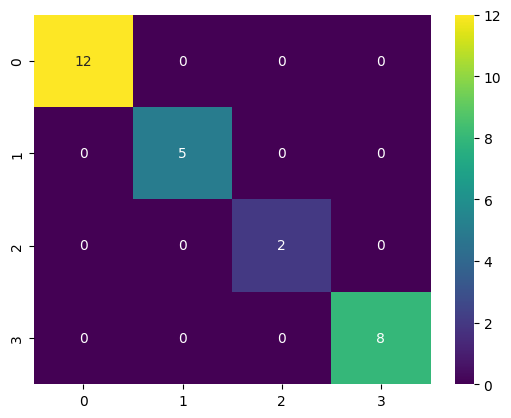

In [45]:
table = pd.DataFrame(confusion_matrix(y_test, y_pred))

sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

In [46]:
from sklearn.metrics import accuracy_score

In [47]:
print(f'Accuracy Score is {accuracy_score(y_test,y_pred)}')

Accuracy Score is 1.0
